# Restaurant Rating Prediction

## Problem Statement:
### The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

## Approach:
### We will Perform extensive Exploratory Data Analysis (EDA) and Build an appropriate Machine Learning Model by applying the Machine Learning algorithm that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

## Let's import all the necessary libraries 

In [35]:
import numpy as np                              
import pandas as pd                
import matplotlib.pyplot as plt   
import seaborn as sns              
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Let's Load Data

In [36]:
data = pd.read_csv("zomato.csv")

In [37]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [38]:
data.shape

(51717, 17)

In [39]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

## Column Description
#### 1) url: contains the url of the restaurant in the zomato website
#### 2) address: contains the address of the restaurant in Bengaluru
#### 3) name: contains the name of the restaurant
#### 4) online_order: whether online ordering is available in the restaurant or not
#### 5) book_table: table book option available or not
#### 6) rate: contains the overall rating of the restaurant out of 5
#### 7) votes: contains total number of rating for the restaurant as of the above mentioned date
#### 8) phone: contains the phone number of the restaurant
#### 9) location: contains the neighborhood in which the restaurant is located
#### 10) rest_type: restaurant type
#### 11) dish_liked: dishes people liked in the restaurant
#### 12) cuisines: food styles, separated by comma
#### 13) approx_cost(for two people): contains the approximate cost for meal for two people
#### 14) reviews_list: list of tuples containing reviews for the restaurant, each tuple
#### 15) menu_item: contains list of menus available in the restaurant
#### 16) listed_in(type): type of meal
#### 17) listed_in(city): contains the neighborhood in which the restaurant is listed

## DATA CLEANING

#### Here we will clean our data for wrong dtypes,we will handle null values , remove irrelevant columns, outliers etc.



### Let's rename the complex named columns for easy understanding



In [40]:
data.rename(columns = {'approx_cost(for two people)' : 'approx_cost', 'listed_in(city)' : 'area'}, inplace = True)

### Let's drop the irrelevant columns

In [41]:
data.drop(['url', 'address','menu_item', 'reviews_list', 'dish_liked', 'phone', 'listed_in(type)'], axis = 1, inplace=True)

In [42]:
df = data

In [43]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


## Let's check for Datatypes

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


###### After above execution we found that  the columns "rate", "location"," rest_type", "approx_cost"," cuisines"  either have null values and  Wrong dtypes or both.

## Let's check for "rate " Column

In [45]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

###### Above execution shows there are many null and garbage values

### Let's replace all the null and garbage values with numbers

In [46]:
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" /5", "")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")

In [47]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

## Let's check for the "approx_cost" column

In [48]:
#unique Values
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [49]:
df['approx_cost'] = df['approx_cost'].str.replace("nan", "NaN")
df['approx_cost'] = df['approx_cost'].fillna('NaN')
df['approx_cost'] = df['approx_cost'].str.replace(",","" )

In [50]:
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

#### Now Let's change the data type Object to Float

In [51]:
df['approx_cost'] = df['approx_cost'].astype(float)
df['rate'] = df['rate'].astype(float)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


## Let's check the data description by Describe Function

###### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.we do statistical analysis on the basis of 5 points summary.

In [53]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


## Let's check for Null Values

In [54]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

##### lets check for the percentage of null values

In [55]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

### From the above execution we found columns "location", "rest_type", "cuisines", "approx_cost" have less number of null values as compared to "rate" column. Let's drop the null values from them

In [56]:
df = df[df["location"].notna()]
df = df[df["rest_type"].notna()]
df = df[df["cuisines"].notna()]
df = df[df["approx_cost"].notna()]

In [57]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

### Let's Handle the null values in the "rate"  coulmns

In [58]:
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

#### Let's check for the outliers by statistical method

In [59]:
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)

xyz = q3 - q1

lower_range = q1 - (1.5 * xyz)
upper_range = q3 + (1.5 * xyz)

outliers = len(df[(df['rate'] < lower_range) | (df['rate'] > upper_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


###### From the above execution we found that we have 183 ouliers in the "rate" column but we are all know rating is always in the range from 1 to 5, so we will impute with median

In [60]:
df['rate'] = df['rate'].fillna(df['rate'].median())

df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

## Let's check for the numerical Columns

In [61]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
print("There are {} numerical features and their names are {}".format(len(Numerical_features), Numerical_features)) 

There are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


### Let's check for the distrubution of the numerical features 

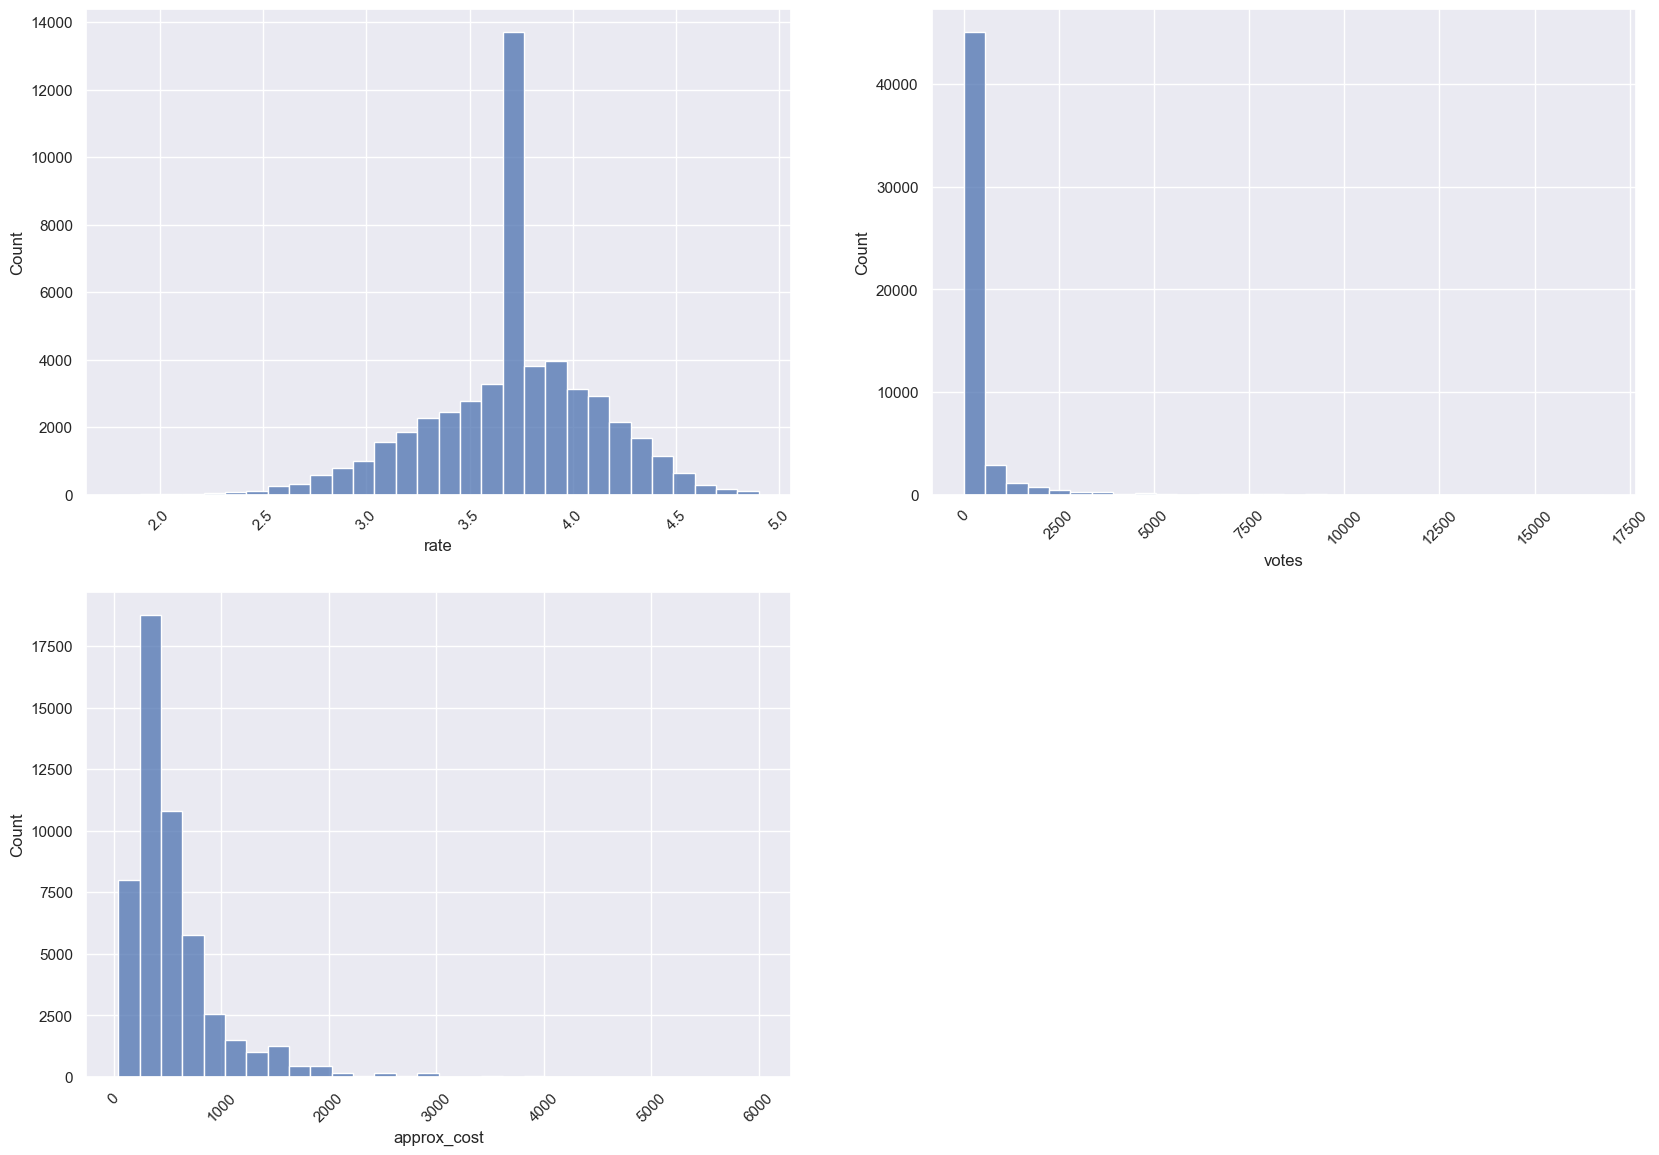

In [62]:
plt.figure(figsize=(20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df, x=i[1], bins=30)
    plt.xticks(rotation=45)

##### Reset the index

In [63]:

df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

# Data Visualization

### Let's check for the Most famous restaurants chains in Bangaluru

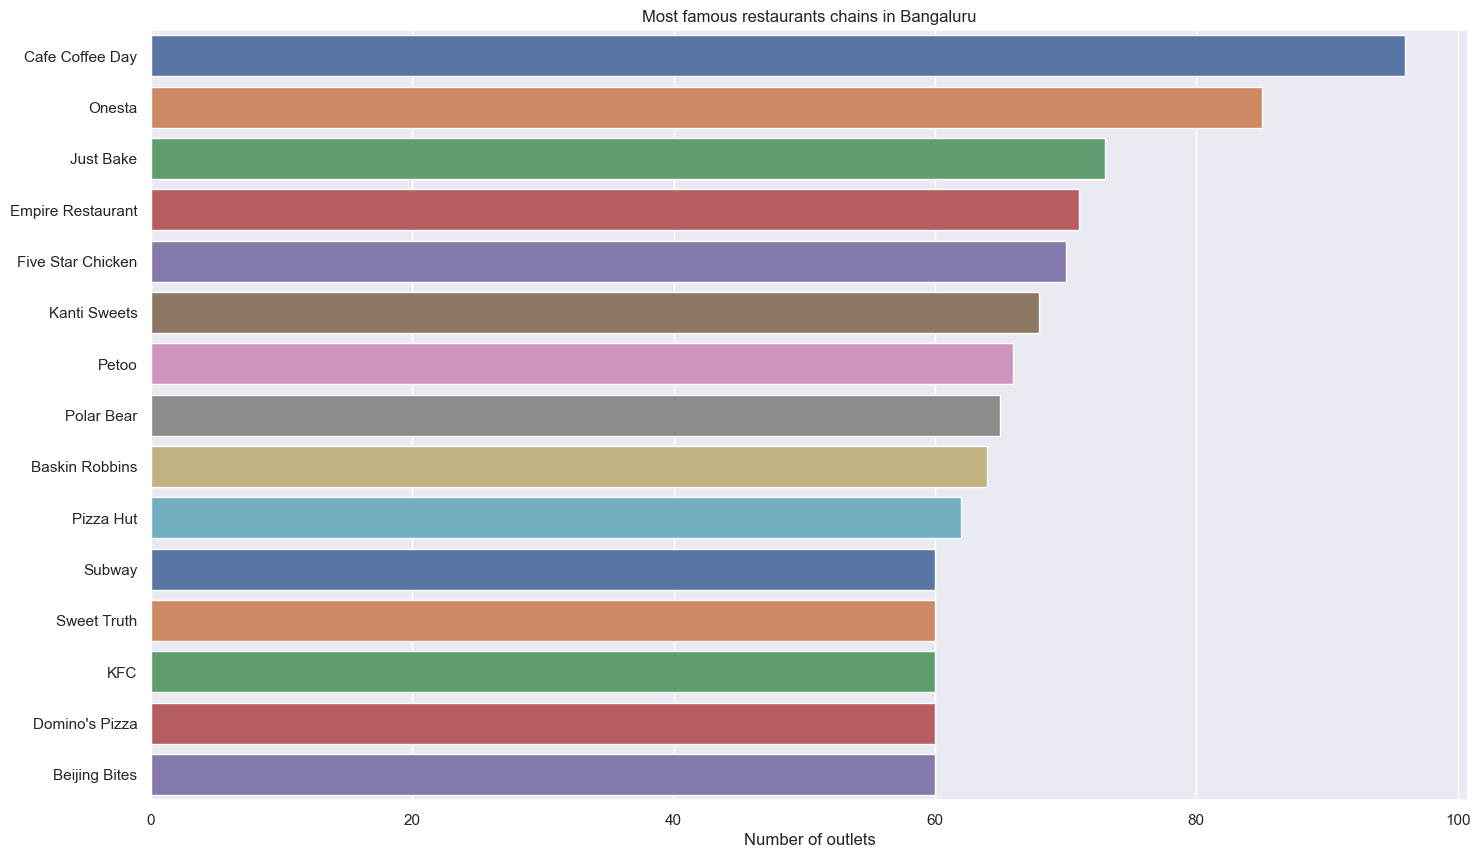

In [64]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette= "deep")
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

### Let's check for the restaurants who have got the highest orders

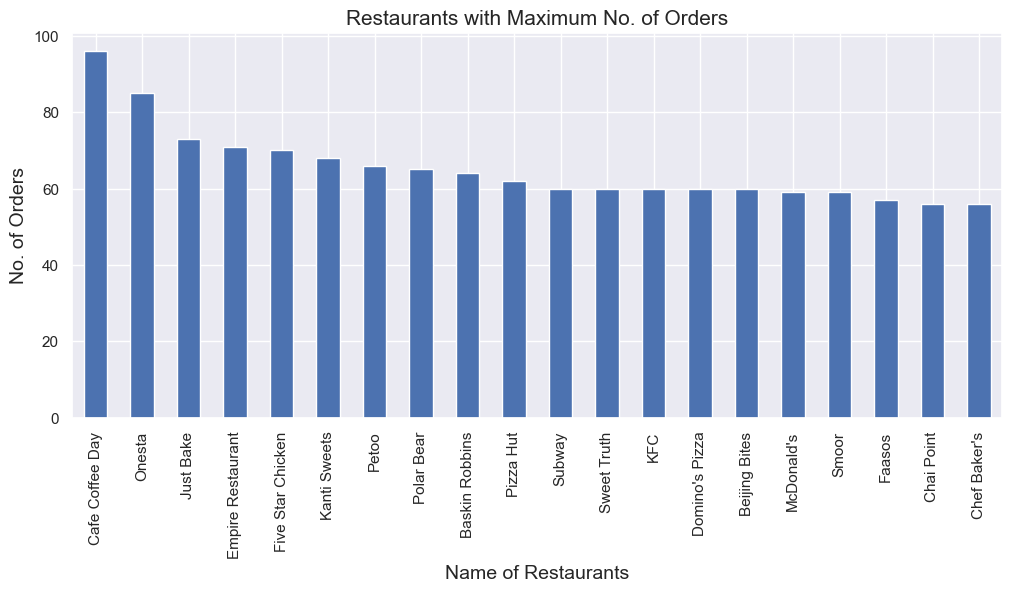

In [65]:
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:20]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum No. of Orders", fontsize=15)
plt.show()

### Let's check how many restaurants have online ordering facilities 

In [66]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

ValueError: could not convert string to float: 'Yes'

###### Above executions show that more than 30000 restaurants has the facility of online delivery

### Let's check how many restaurants offer Pre Booking Table bookings

In [ ]:
data = df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (6,5))
fx = sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 12)
plt.show()

###### Above execution show less than 1000 restauranrs have prebooking table facility

### Let's check the locations that have highest orders

In [ ]:
plt.figure(figsize = (12,6))
data = df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title ('Top Locations get higher number of orders', size = 20)
plt.show()

###### Above execution shows that location "BTM" has highest number of orders

### Let's check for the most common ratings for the orders

In [ ]:
plt.figure(figsize=(8,7))

sns.distplot(df['rate'],bins=30)

###### Above execution shows us that maximum number of orders got 3.7 rating for their restaurants.

### Let's check for the Common Approximate Costs for meal of two people

In [ ]:
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns = ['approx_cost', 'count']
data = data.set_index('approx_cost')
plt.figure(figsize = (15, 7))
sns.barplot(x = data.index, y=data['count'])
plt.xlabel('Rate for Two People', size=20)
plt.ylabel('No. of orders', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people', size = 25)
plt.show()


### Let's check top 10  types of the orders restaurants offer

In [ ]:
plt.figure(figsize=(12,5))
abc = df.rest_type.value_counts()[:10]
abc.plot(kind='pie')
plt.title("Most Famous Restaurant Types",fontsize=15)

plt.show()

### Let's check for Most famous Cusines among People

In [ ]:
plt.figure(figsize=(12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most famous Cusines among People",fontsize=15)
plt.show()

### Let's check for the Top Locations with Most Number of Restaurants

In [ ]:
loc = pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns = ['count']
loc.sort_values(by='count', ascending= False, inplace=True)
plt.rcParams['figure.figsize'] = (8,6)
ax = loc[0:10].plot(kind='pie', subplots = True)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

### Let's find the Relationship between the features.

In [ ]:
plt.figure(figsize=(6,4))

sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

## Let's Build Our Model

In [ ]:
df.head()

### Let's Convert the categorical variables into a numeric format

### For the column "online_order"

In [ ]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [ ]:
df.head()

### For the column "book_table"

In [ ]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0
df.head()

### For the Rest Type Column

In [ ]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

In [ ]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [ ]:
rest_df.head()

In [ ]:

rest_df.drop(['rest_type'], axis = 1, inplace=True)
rest_df.head()

### For Cuisines Column

In [ ]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()


In [ ]:

correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

In [ ]:

cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

### For the "Location" column

In [ ]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()


In [ ]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()

### For the "Area" Column

In [ ]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

In [ ]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

### Let's do the Feature Selection

In [ ]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])

In [ ]:
x1 = data_with_location.drop("rate", axis = 1).values
y1 = data_with_location["rate"].values

print("X = ", x1)
print("Y = ", y1)

In [ ]:
x2 = data_with_area.drop("rate", axis = 1).values
y2 = data_with_area["rate"].values

print("X = ", x2)
print()
print("Y = ", y2)

# ExtraTree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x1, y1)
print(imp_features1.feature_importances_)

In [ ]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

In [ ]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(x2, y2)
print(imp_features2.feature_importances_)

In [ ]:
plt.figure(figsize = (12,8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

# Train Test Splitting of Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=45)


# Let's import ML Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear Regression

### For data_with_location

In [ ]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

In [ ]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:200]

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()


### For the Data with area

In [ ]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

In [ ]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:200]


In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test-Y_lr2, kde=True)
plt.show()

# Random Forest Regression

### For data_with_location

In [ ]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

In [ ]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(Y1_test-Y_rf1, kde=True, bins=100)
plt.show()

### For data_with_area

In [ ]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

In [ ]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

# Decision Tree Regressor

### For Data_With_Location

In [ ]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

In [ ]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test-Y_dt1, bins=100, alpha=0.6)
plt.show()

### For Data_with_Area

In [ ]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

In [ ]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression Model

### for data_with_location

In [ ]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

### for data_with_area

In [ ]:
mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

# Random Forest Regression Model

### for data_with_location

In [ ]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

### for data_with_area

In [ ]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

# Decision Tree Regression Model

### for data_with_location

In [ ]:
mae =  mean_absolute_error(Y1_test, Y_dt1)
mse = mean_squared_error(Y1_test, Y_dt1)
r2score = r2_score(Y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

### for data_with_area

In [ ]:
mae =  mean_absolute_error(Y2_test, Y_dt2)
mse = mean_squared_error(Y2_test, Y_dt2)
r2score = r2_score(Y2_test, Y_dt2)


print("Coefficient of Determination for train data : ",dt2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

###### All the ThreeModels has been tranied, Linear regression, Random forest regression and Decision tree regression.
###### In this model best model for prediction is Random forest regression model.so we will be using Random forest regression model.
###### Selected model accuracy is 90% up.

# SAVE MODEL

In [ ]:
import pickle

In [ ]:
with open('rating_prediction.pkl', 'wb') as file:
    pickle.dump(rf1, file)